# **Data Mining Superstore: Explorasi, Klasifikasi**

**Langkah 1 : Upload Dan Load Data**

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
df = pd.read_excel("Datasets Superstore.xlsx")
df.head

Saving Datasets Superstore.xlsx to Datasets Superstore.xlsx


<bound method NDFrame.head of       Row ID        Order ID Order Date  Year     Month  Day       Ship Mode  \
0          1  CA-2016-152156 2016-11-08  2016  November    8    Second Class   
1          2  CA-2016-152156 2016-11-08  2016  November    8    Second Class   
2          3  CA-2016-138688 2016-06-12  2016      Juni   12    Second Class   
3          4  US-2015-108966 2015-10-11  2015   Oktober   11  Standard Class   
4          5  US-2015-108966 2015-10-11  2015   Oktober   11  Standard Class   
...      ...             ...        ...   ...       ...  ...             ...   
9989    9990  CA-2014-110422 2014-01-21  2014   Januari   21    Second Class   
9990    9991  CA-2017-121258 2017-02-26  2017  Februari   26  Standard Class   
9991    9992  CA-2017-121258 2017-02-26  2017  Februari   26  Standard Class   
9992    9993  CA-2017-121258 2017-02-26  2017  Februari   26  Standard Class   
9993    9994  CA-2017-119914 2017-05-04  2017       Mei    4    Second Class   

     Customer ID     Customer Name    Segment  ... Postal Code Region  \
0       CG-12520       Claire Gute   Consumer  ...       42420  South   
1       CG-12520       Claire Gute   Consumer  ...       42420  South   
2       DV-13045   Darrin Van Huff  Corporate  ...       90036   West   
3       SO-20335    Sean O'Donnell   Consumer  ...       33311  South   
4       SO-20335    Sean O'Donnell   Consumer  ...       33311  South   
...          ...               ...        ...  ...         ...    ...   
9989    TB-21400  Tom Boeckenhauer   Consumer  ...       33180  South   
9990    DB-13060       Dave Brooks   Consumer  ...       92627   West   
9991    DB-13060       Dave Brooks   Consumer  ...       92627   West   
9992    DB-13060       Dave Brooks   Consumer  ...       92627   West   
9993    CC-12220      Chris Cortes   Consumer  ...       92683   West   

           Product ID         Category Sub-Category  \
0     FUR-BO-10001798        Furniture    Bookcases   
1     FUR-CH-10000454        Furniture       Chairs   
2     OFF-LA-10000240  Office Supplies       Labels   
3     FUR-TA-10000577        Furniture       Tables   
4     OFF-ST-10000760  Office Supplies      Storage   
...               ...              ...          ...   
9989  FUR-FU-10001889        Furniture  Furnishings   
9990  FUR-FU-10000747        Furniture  Furnishings   
9991  TEC-PH-10003645       Technology       Phones   
9992  OFF-PA-10004041  Office Supplies        Paper   
9993  OFF-AP-10002684  Office Supplies   Appliances   

                                           Product Name     Sales Quantity  \
0                     Bush Somerset Collection Bookcase  261.9600        2   
1     Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400        3   
2     Self-Adhesive Address Labels for Typewriters b...   14.6200        2   
3         Bretford CR4500 Series Slim Rectangular Table  957.5775        5   
4                        Eldon Fold 'N Roll Cart System   22.3680        2   
...                                                 ...       ...      ...   
9989                             Ultra Door Pull Handle   25.2480        3   
9990  Tenex B1-RE Series Chair Mats for Low Pile Car...   91.9600        2   
9991                              Aastra 57i VoIP phone  258.5760        2   
9992  It's Hot Message Books with Stickers, 2 3/4" x 5"   29.6000        4   
9993  Acco 7-Outlet Masterpiece Power Center, Wihtou...  243.1600        2   

     Discount    Profit  
0        0.00   41.9136  
1        0.00  219.5820  
2        0.00    6.8714  
3        0.45 -383.0310  
4        0.20    2.5164  
...       ...       ...  
9989     0.20    4.1028  
9990     0.00   15.6332  
9991     0.20   19.3932  
9992     0.00   13.3200  
9993     0.00   72.9480  

[9994 rows x 23 columns]>

**Langkah 2 : Eksplorasi Data**

In [ ]:
df.info()
print("\nMissing values : \n", df.isnull().sum())
df.describe()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Year           9994 non-null   int64         
 4   Month          9994 non-null   object        
 5   Day            9994 non-null   int64         
 6   Ship Mode      9994 non-null   object        
 7   Customer ID    9994 non-null   object        
 8   Customer Name  9994 non-null   object        
 9   Segment        9994 non-null   object        
 10  Country        9994 non-null   object        
 11  City           9994 non-null   object        
 12  State          9994 non-null   object        
 13  Postal Code    9994 non-null   int64         
 14  Region         9994 non-null   object        
 15  Product ID     9994 n

Index(['Row ID', 'Order ID', 'Order Date', 'Year', 'Month', 'Day', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

**Langkah 3 : Visualisasi**

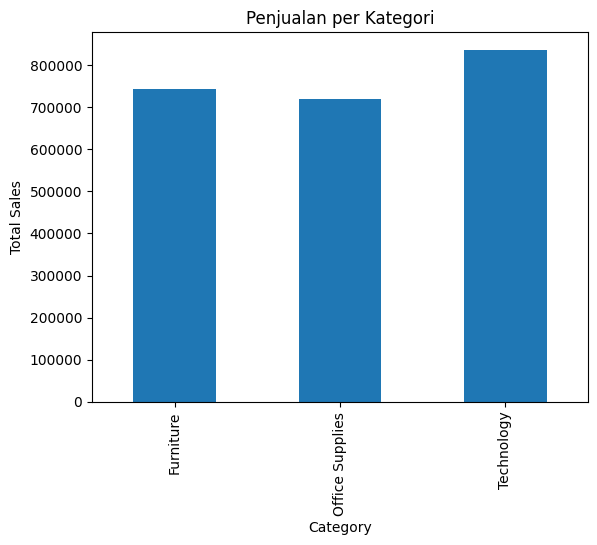

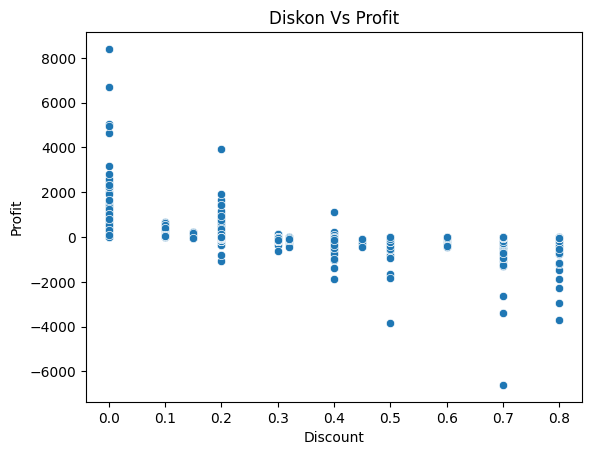

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df.groupby('Category')['Sales'].sum().plot(kind='bar', title='Penjualan per Kategori')
plt.ylabel('Total Sales')
plt.show()

sns.scatterplot(data=df, x='Discount', y='Profit')
plt.title('Diskon Vs Profit')
plt.show()

**Langkah 4 : Klasifikasi Untung/Rugi**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

df['Label'] = df['Profit'].apply(lambda x:1 if x > 0 else 0)
features = df[['Sales', 'Discount', 'Quantity']].fillna(0)
labels = df['Label']

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=2)
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.83      0.80       552
           1       0.96      0.95      0.95      2447

    accuracy                           0.93      2999
   macro avg       0.87      0.89      0.88      2999
weighted avg       0.93      0.93      0.93      2999

Confusion Matrix: 
 [[ 456   96]
 [ 128 2319]]


# **TUGAS - BUAT 3 ALGO LAIN DENGAN ACUAN DATA PADA EXCEL YANG SAMA**

**Algo 1 - Support Vector Machine (SVM): Klasifikasi Discount**

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.61      0.68      1502
           1       0.68      0.82      0.74      1497

    accuracy                           0.71      2999
   macro avg       0.72      0.71      0.71      2999
weighted avg       0.72      0.71      0.71      2999



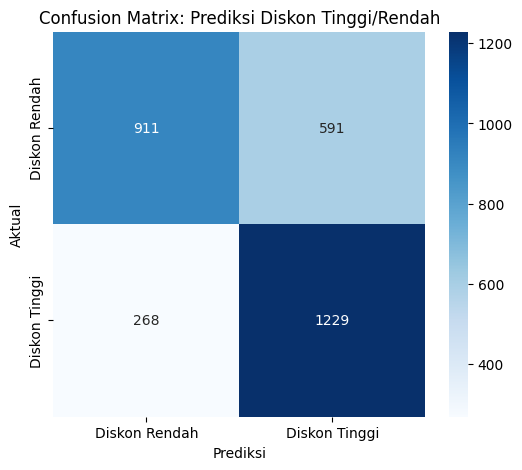

Jumlah total produk: 9994
Jumlah produk dengan diskon tinggi: 5050
Jumlah produk dengan diskon rendah: 4944


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Label: 1 kalau Discount >= 0.2 (diskon tinggi), 0 kalau lebih rendah
df['Label'] = df['Discount'].apply(lambda x: 1 if x >= 0.2 else 0)

features = df[['Sales', 'Profit', 'Quantity']].fillna(0)
labels = df['Label']

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=2)

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Diskon Rendah', 'Diskon Tinggi'], yticklabels=['Diskon Rendah', 'Diskon Tinggi'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix: Prediksi Diskon Tinggi/Rendah')
plt.show()

total_produk = df.shape[0]
print(f"Jumlah total produk: {total_produk}")

# Jumlah produk dengan diskon tinggi (Label 1)
produk_diskon_tinggi = df[df['Label'] == 1].shape[0]
print(f"Jumlah produk dengan diskon tinggi: {produk_diskon_tinggi}")

# Jumlah produk dengan diskon rendah (Label 0)
produk_diskon_rendah = df[df['Label'] == 0].shape[0]
print(f"Jumlah produk dengan diskon rendah: {produk_diskon_rendah}")

**Algo 2 - K Nearest Neighbors(KNN): Klasifikasi Segment**

Classification Report:
               precision    recall  f1-score   support

    Consumer       0.50      0.75      0.60      1510
   Corporate       0.33      0.21      0.26       955
 Home Office       0.12      0.03      0.05       534

    accuracy                           0.45      2999
   macro avg       0.32      0.33      0.30      2999
weighted avg       0.38      0.45      0.39      2999



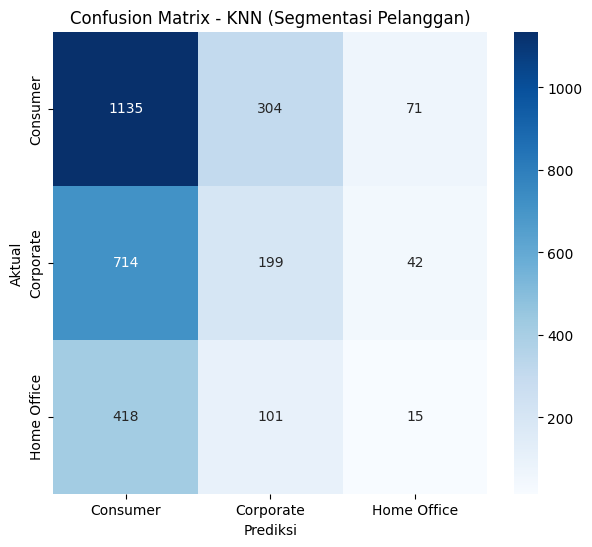

Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

labels = df['Segment']

features = df[['Sales', 'Profit', 'Quantity', 'Region']].copy()

features_encoded = pd.get_dummies(features, columns=['Region'])

x_train, x_test, y_train, y_test = train_test_split(features_encoded, labels, test_size=0.3, random_state=2)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)

plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix - KNN (Segmentasi Pelanggan)')
plt.show()

print(df['Segment'].value_counts())



**Algo 3 - Random Forest: Klasifikasi Category**

Classification Report (Random Forest - Kategori Produk):
                  precision    recall  f1-score   support

      Furniture       0.62      0.53      0.57       632
Office Supplies       0.80      0.88      0.84      1790
     Technology       0.59      0.51      0.55       577

       accuracy                           0.73      2999
      macro avg       0.67      0.64      0.65      2999
   weighted avg       0.72      0.73      0.73      2999



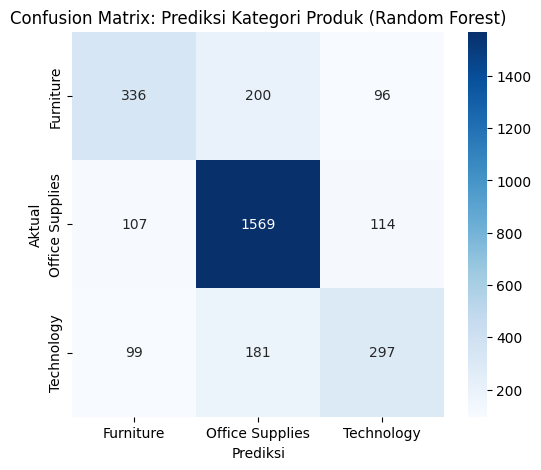

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


features = df[['Sales', 'Quantity', 'Profit']]
labels = df['Category']

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=2)

rf_model_category = RandomForestClassifier(n_estimators=100, random_state=2)

rf_model_category.fit(x_train, y_train)

y_pred_rf_category = rf_model_category.predict(x_test)

print("Classification Report (Random Forest - Kategori Produk):\n", classification_report(y_test, y_pred_rf_category))

cm_rf_category = confusion_matrix(y_test, y_pred_rf_category)

plt.figure(figsize=(6,5))
sns.heatmap(cm_rf_category, annot=True, fmt='d', cmap='Blues', xticklabels=df['Category'].unique(), yticklabels=df['Category'].unique())
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix: Prediksi Kategori Produk (Random Forest)')
plt.show()

print(df['Category'].value_counts())